In [24]:
import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u
from astropy import constants as c
from scipy.integrate import quad
from scipy.interpolate import CubicSpline
from tqdm import tqdm

In [32]:
D = 12  # m

In [33]:
def get_xi(b):
    return b / (D/2)

In [25]:
def get_rel_intensity(phi, xi):

    radical = xi**2 * np.cos(phi)**2 - xi**2 + 1
    return (xi * np.cos(phi) + np.sqrt(radical))

In [26]:
phis = np.linspace(-np.pi, np.pi, 10000)
xi_list = [0, 0.25, 0.5, 0.75, 1]

In [27]:
clrs = ['orangered', 'gold', 'lime', 'deepskyblue', 'fuchsia']

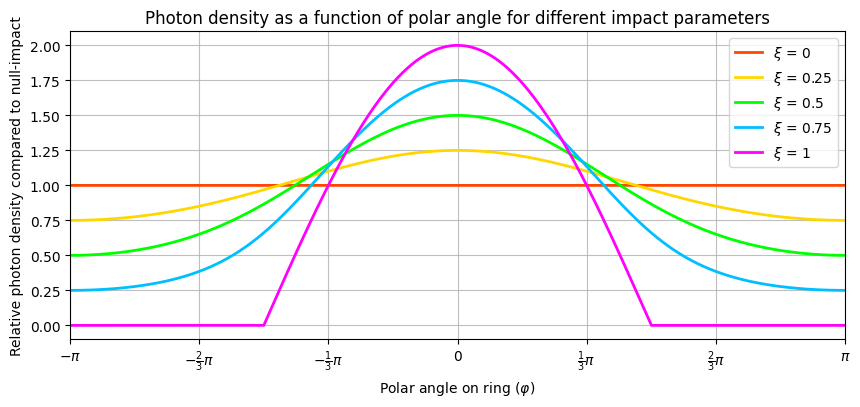

In [28]:
plt.figure(figsize=(10, 4))

for i, xi in enumerate(xi_list):
    plt.plot(phis, get_rel_intensity(phis, xi), color=clrs[i], lw=2,
             label=r'$\xi$ = {}'.format(xi))

plt.grid(alpha=0.8)
plt.xlabel(r'Polar angle on ring ($\varphi$)')
plt.ylabel('Relative photon density compared to null-impact')
plt.title('Photon density as a function of polar angle for different impact parameters')

plt.xticks(ticks=[-np.pi, -2/3*np.pi, -1/3*np.pi, 0, 1/3*np.pi, 2/3*np.pi, np.pi],
           labels=[r'$-\pi$', r'$-\frac{2}{3}\pi$', r'$-\frac{1}{3}\pi$', '$0$', r'$\frac{1}{3}\pi$', r'$\frac{2}{3}\pi$', r'$\pi$'])
plt.xlim(-np.pi, np.pi)

plt.legend()
plt.show()

In [36]:
def get_impact_factor(xi):

    integ = quad(get_rel_intensity, -np.pi, np.pi, args=(xi))[0]
    return integ / (1 * 2*np.pi)

In [37]:
xis = np.linspace(0, 1, 1000)
total_rel_photon_yield = np.zeros_like(xis)

for i, xi in enumerate(xis):
    total_rel_photon_yield[i] = get_impact_factor(xi)

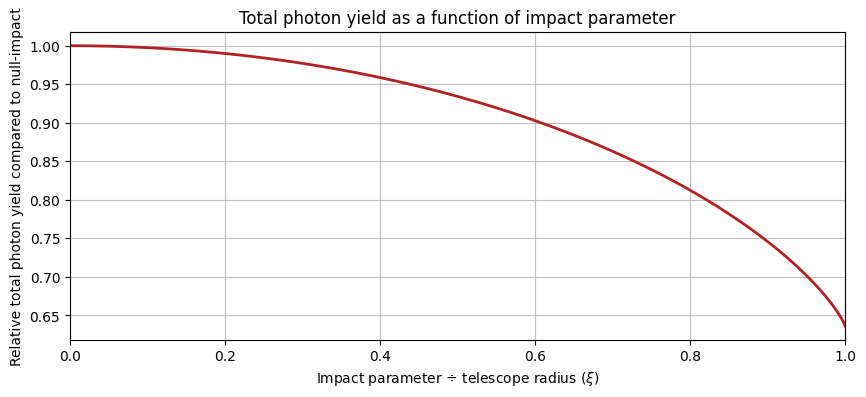

In [38]:
plt.figure(figsize=(10, 4))

plt.plot(xis, total_rel_photon_yield, lw=2, c='firebrick')

plt.grid(alpha=0.8)
plt.xlabel(r'Impact parameter $\div$ telescope radius ($\xi$)')
plt.ylabel('Relative total photon yield compared to null-impact')
plt.title('Total photon yield as a function of impact parameter')

plt.xlim(0, 1)

plt.show()

In [40]:
# Redefine

def get_rel_intensity(phi, xi):

    radical = 1 - xi**2 * np.sin(phi)**2
    return np.sqrt(radical)

def get_impact_factor(xi):

    if xi > 1:
        bound = np.arcsin(1/xi)
    else:
        bound = np.pi/2
    
    integ = quad(get_rel_intensity, 0, bound, args=(xi))[0]
    return integ * 2 / np.pi